In [0]:
import numpy as np
import pylab as pl

In [2]:
print(1.*np.zeros(100))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [4]:
choice = np.random.rand(100)
print(choice)

[4.53156290e-01 6.22536228e-01 4.05744784e-01 7.87951451e-01
 3.74446266e-01 9.30241119e-02 7.90257434e-01 7.86033580e-02
 6.19032463e-02 9.52544805e-01 6.18487525e-02 3.72080903e-01
 1.95776928e-01 8.63119312e-02 6.28581654e-01 6.19436543e-01
 5.31973163e-01 9.50906010e-01 7.72465442e-01 9.17474941e-01
 5.53275634e-01 6.91689601e-02 2.83699218e-01 2.30249072e-01
 6.77305200e-01 7.57379929e-01 7.35011227e-01 8.00068050e-01
 1.18733690e-01 5.43755762e-01 6.23663709e-01 3.52045187e-02
 9.60182519e-01 9.29246688e-01 1.15459837e-01 4.90339332e-01
 8.70148364e-01 8.57525221e-01 2.21640960e-01 7.15688336e-02
 7.20062007e-01 6.16979331e-01 5.42676817e-02 9.26883232e-01
 6.38630098e-01 1.21199298e-01 8.96946945e-01 7.29708830e-01
 8.84732756e-01 6.50909389e-01 6.87970765e-01 5.35261516e-01
 1.19270982e-01 2.02208506e-01 5.77562745e-01 5.82752283e-01
 3.24073095e-01 6.64110266e-01 1.20043544e-01 6.82193824e-01
 6.02932337e-01 1.16787552e-01 1.83961806e-01 1.80109552e-01
 4.79092170e-01 8.179377

In [12]:
tt = [choice >= 0.5]
ttt = [choice < 0.5]
print(tt)

[array([False,  True, False,  True, False, False,  True, False, False,
        True, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True, False, False, False,  True,  True,  True,
        True, False,  True,  True, False,  True,  True, False, False,
        True,  True, False, False,  True,  True, False,  True,  True,
       False,  True,  True,  True,  True,  True,  True, False, False,
        True,  True, False,  True, False,  True,  True, False, False,
       False, False,  True, False, False,  True, False, False,  True,
       False, False,  True,  True,  True, False, False, False,  True,
        True, False, False,  True, False,  True,  True,  True,  True,
       False,  True, False,  True, False,  True,  True,  True,  True,
       False])]


In [14]:
dd = np.random.normal(6,1,100)
print(len(dd))
print("****")
print(len(dd[tt]))
print(len(dd[ttt]))

100
****
55
45


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """


In [0]:
def GMM():
  N = 100
  pl.ion() # interactive mode on
  y = 1.*np.zeros(N)
  out1 = np.random.normal(6,1,N) #mu=6, sigma=1, size=100
  out2 = np.random.normal(1,1,N)
  choice = np.random.rand(N)

  w = [choice >= 0.5] #prob of picking Gaussian one is = 0.5
  y[w] = out1[w]
  w = [choice < 0.5]
  y[w] = out2[w]

  pl.clf() #clear window
  pl.hist(y, fc = '0.5') #facecolour
  
  mu1 = y[np.random.randint(0,N-1,1)]
  mu2 = y[np.random.randint(0,N-1,1)]
  s1 = np.sum((y-np.mean(y))**2)/N #std
  s2 = s1
  pi = 0.5 #prob of picking Gaussian one is = 0.5

  count = 0
  gamma = 1.*np.zeros(N)
  nits = 50

  ll = 1.*np.zeros(nits)

  while count < nits:
    count += 1
    #repeat til converge
    #E-step
    for i in range(N):
      gamma[i] = pi*np.exp(-(y[i]-mu1)**2/(2*s1))/(pi * np.exp(-(y[i]-mu1)**2/(2*s1)) + (1-pi)* np.exp(-(y[i]-mu2)**2/2*s2))
    
    #M-step
    mu1 = np.sum((1-gamma)*y)/np.sum(1-gamma)
    mu2 = np.sum(gamma*y)/np.sum(gamma)
    mu2 = np.sum(gamma*y)/np.sum(gamma)
    s1 = np.sum((1-gamma)*(y-mu1)**2)/np.sum(1-gamma)
    s2 = np.sum(gamma*(y-mu2)**2)/np.sum(gamma)
    pi = np.sum(gamma)/N

    ll[count-1] = np.sum(np.log(pi*np.exp(-(y[i]-mu1)**2/(2*s1)) + (1-pi)*np.exp(-(y[i]-mu2)**2/(2*s2))))
  
  x = np.arange(-2,8.5,0.1)
  y = 40*pi*np.exp(-(x-mu1)**2/(2*s1)) + 40*(1-pi)*np.exp(-(x-mu2)**2/(2*s2))

  pl.plot(x,y,'k',linewidth=4)
  pl.figure(), pl.plot(ll,'ko-')
  pl.show()
  print(x)
  print("")
  print(y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if sys.path[0] == '':


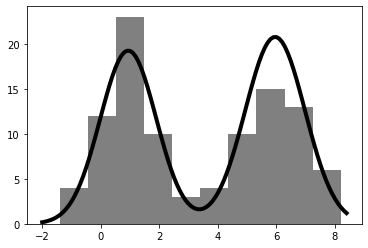

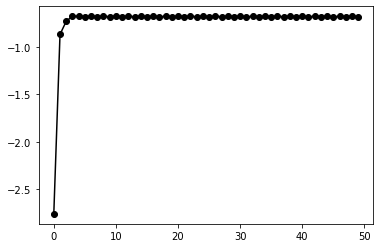

[-2.00000000e+00 -1.90000000e+00 -1.80000000e+00 -1.70000000e+00
 -1.60000000e+00 -1.50000000e+00 -1.40000000e+00 -1.30000000e+00
 -1.20000000e+00 -1.10000000e+00 -1.00000000e+00 -9.00000000e-01
 -8.00000000e-01 -7.00000000e-01 -6.00000000e-01 -5.00000000e-01
 -4.00000000e-01 -3.00000000e-01 -2.00000000e-01 -1.00000000e-01
  1.77635684e-15  1.00000000e-01  2.00000000e-01  3.00000000e-01
  4.00000000e-01  5.00000000e-01  6.00000000e-01  7.00000000e-01
  8.00000000e-01  9.00000000e-01  1.00000000e+00  1.10000000e+00
  1.20000000e+00  1.30000000e+00  1.40000000e+00  1.50000000e+00
  1.60000000e+00  1.70000000e+00  1.80000000e+00  1.90000000e+00
  2.00000000e+00  2.10000000e+00  2.20000000e+00  2.30000000e+00
  2.40000000e+00  2.50000000e+00  2.60000000e+00  2.70000000e+00
  2.80000000e+00  2.90000000e+00  3.00000000e+00  3.10000000e+00
  3.20000000e+00  3.30000000e+00  3.40000000e+00  3.50000000e+00
  3.60000000e+00  3.70000000e+00  3.80000000e+00  3.90000000e+00
  4.00000000e+00  4.10000

In [39]:
GMM()